# Testing 511 peak issue
> Through some differences in processing, the 511 peak is gone for full system. 

In [45]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

## Debugging   
* compare the L3 files at tracker to check what the energy spectra looks. It should be the same.

In [46]:
old_l3="/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run282/OLD_PROCESS_TKR_R282_Na22_combined.h5"
new_l3="/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run282/TKR_R282_combined.L3.h5"

In [47]:
oldfile = h5py.File(old_l3,'r')
newfile = h5py.File(new_l3,'r')

In [38]:
def get_trk_nrg(trk_nrg, evt_id):
    """Get tracker energy in (n_evt, energy) format.
    
    Parameters
    ----------
        trk_nrg : dataset
            trk energy => f_trk['Events/TKR/Energy'][...]
        evt_id : dataset
            event id dataset => evt_id = f_trk['Events/TKR/EventID'][...] 
    Returns
    -------
        Energy array in an (nevents, no.hits) shape. nohits here defined by max hit per event id
    """
    nrg_id = trk_nrg[:,0] # select the tracker energy id
    unique_nrgid, counts = np.unique(nrg_id, return_counts=True) # get unique eventid and the no. of counts
    new_energy_ar = np.zeros(shape=(evt_id.shape[0],max(counts))) # evt_id = unique event id

    print(unique_nrgid.shape[0])
    for u_id in range(unique_nrgid.shape[0]):
    # for u_id in range(50000):
        print(u_id) if u_id%10000 == 0 else None
        tid = unique_nrgid[u_id]                # unique id.
        t_loc = np.where(nrg_id ==tid)          # find locations for the ids
        t_loc1 = np.where(tid == evt_id)        # find where the ids are in event ids.
        t_nrg= trk_nrg[t_loc[0],4]            # get the energies.
    
        for j in range(len((t_loc[0]))):
            new_energy_ar[t_loc1[0],j] = t_nrg[j]

    return new_energy_ar

In [39]:
old_arr1 = oldfile['tracker/energy'][...]
filter_condition = (old_arr1[..., 5] == 1) | (old_arr1[..., 5] == 2)
# Create new_array using boolean indexing
old_arr = old_arr1[filter_condition]

In [40]:
# old_nrg_arr= np.array(old_arr[:,4])
old_evt_id = np.array(old_arr[:,0])

In [41]:
old_nrg_arr=get_trk_nrg(old_arr, old_evt_id )

710066
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000


In [42]:
new_arr1 = newfile['tracker/energy'][...]
filter_condition = (new_arr1[..., 5] == 1) | (new_arr1[..., 5] == 2)
# Create new_array using boolean indexing
new_arr = new_arr1[filter_condition]

In [43]:
new_evt_id = np.array(new_arr[:,0])

In [44]:
new_nrg_arr=get_trk_nrg(new_arr, new_evt_id )

710066
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000


In [19]:
old_nrg = np.array(old_arr[:,4])
new_nrg = np.array(new_arr[:,4])

Text(0, 0.5, 'Counts')

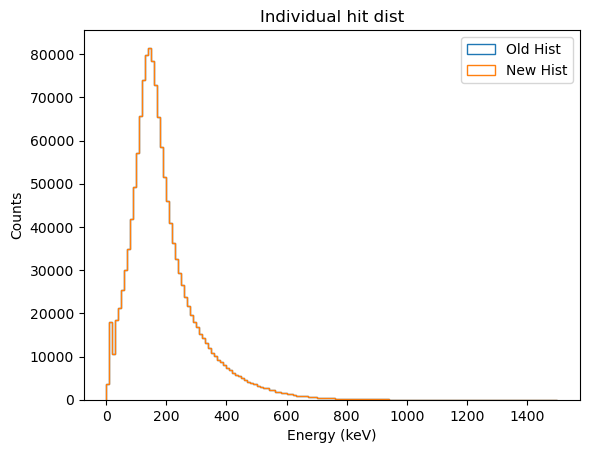

In [33]:
plt.hist(old_nrg, bins=150, range=[0,1500],  label='Old Hist', histtype="step")
plt.hist(new_nrg, bins=150, range=[0,1500],  label='New Hist', histtype="step")
plt.legend(loc="upper right")
plt.title("Individual hit dist")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

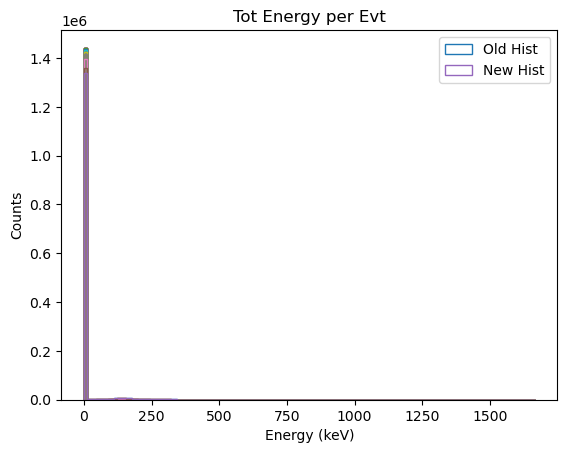

In [35]:
plt.hist(old_nrg_arr, bins=150,  label='Old Hist', histtype="step")
plt.hist(new_nrg_arr, bins=150,  label='New Hist', histtype="step")
plt.legend(loc="upper right")
plt.title("Tot Energy per Evt")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")